# Loan Default Project

### Problem Statement: 
#### Machine Learning algorithms in predicting which customers will default on their loans based on their financial information and historical data.

###  Modeling

### 1. Import the Loan Default Data

In [2]:
#import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import the loan default dataset
loan_Default_Data = pd.read_csv(r'C:/Users/pooja/OneDrive/Desktop/ML_Loan Default Prediction/Loan_Default_FE_Data.csv').drop('Unnamed: 0',axis='columns')
#loan_Default_Data

In [4]:
#let's check howmany and what colums we have in our table
#loan_Default_Data.info()

### 2. Set X and y labels for the Model

In [5]:
#### Independent and Dependent Features
X=loan_Default_Data.drop("Loan_Status",axis=1)
y=loan_Default_Data.Loan_Status

In [6]:
loan_Default_Data.iloc[: , -1].value_counts()

0.0    606
1.0     76
Name: Loan_Status, dtype: int64

### 3. Train a ML model to predict customers who are more likely to default on loans

In [7]:
#import Library
from sklearn.model_selection import train_test_split , cross_val_score,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix,confusion_matrix,roc_auc_score,accuracy_score
from sklearn.metrics import accuracy_score , f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### 4. Balance the dataset

#### SMOTE Technique

In [9]:
from imblearn.combine import SMOTETomek
from collections import Counter

os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0.0: 421, 1.0: 56})
The number of classes after fit Counter({0.0: 382, 1.0: 276})


C:\Users\pooja\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


### 5. Evaluate base model performance with Random Forest , Decision Tree and XGBoost Classifier after balancing dataset

#### RandomForest Model

In [15]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_ns,y_train_ns)
rfy_pred = rfc.predict(X_test)
print(classification_report(y_test,rfy_pred))
print(confusion_matrix(y_test,rfy_pred))
print(accuracy_score(y_test,rfy_pred))
print(roc_auc_score(y_test,rfy_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       185
         1.0       0.27      0.30      0.29        20

    accuracy                           0.85       205
   macro avg       0.60      0.61      0.60       205
weighted avg       0.86      0.85      0.86       205

[[169  16]
 [ 14   6]]
0.8536585365853658
0.6067567567567568


#### DecisionTree Model

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train_ns,y_train_ns)
dfy_pred = dt.predict(X_test)
print(classification_report(y_test,dfy_pred))
print(confusion_matrix(y_test,dfy_pred))
print(accuracy_score(y_test,dfy_pred))
print(roc_auc_score(y_test,dfy_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       185
         1.0       0.19      0.30      0.23        20

    accuracy                           0.80       205
   macro avg       0.55      0.58      0.56       205
weighted avg       0.85      0.80      0.82       205

[[159  26]
 [ 14   6]]
0.8048780487804879
0.5797297297297298


#### XGBoost Classifier

In [23]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

#ignore wornings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#ignore Special characters
import re
regex = re.compile(r"\[|\]|<>,", re.IGNORECASE)

X_train_ns.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

xg_cl=xgb.XGBClassifier(objective = "binary:logistic",eval_metric = "logloss", learning_rate = 0.1, max_depth =3,seed =42,n_estimators=150,use_label_encoder =False)
xg_cl.fit(X_train_ns,y_train_ns,verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [24]:
xgy_pred = xg_cl.predict(X_test)
print(roc_auc_score(y_test,xgy_pred))
print(accuracy_score(y_test,xgy_pred))

0.6074324324324325
0.8146341463414634


#### Chaeck Roc-Auc Curve for all 3 models

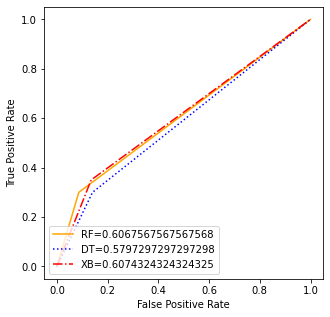

In [25]:
#define metrics
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

#random forest
rfpr, rtpr, thresold = roc_curve(y_test,rfy_pred)
auc_logistic = auc(rfpr,rtpr)

#decision
dfpr, dtpr, thresold = roc_curve(y_test,dfy_pred)
auc_logistic1 = auc(dfpr,dtpr)

#Xgboost
xfpr, xtpr, thresold = roc_curve(y_test,xgy_pred)
auc_logistic3 = auc(xfpr,xtpr)


#create ROC curve
plt.figure(figsize = (5,5))
plt.plot(rfpr,rtpr,linestyle = "-",color='orange',label="RF="+str(auc_logistic))
plt.plot(dfpr,dtpr,linestyle = ":" ,color='blue',label="DT="+str(auc_logistic1))
plt.plot(xfpr,xtpr,linestyle = "-." ,color='red',label="XB="+str(auc_logistic3))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=3)
plt.show()

### 6. Hyperpaqrameter Tuning in Random Forest and Xgboost

#### Hyperpaqrameter Tuning in Random Forest

In [39]:
# Random Search CV - random forest
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=2,stop=100,num=3)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(2,10,2)]
min_samples_split = [4,2,6,3]
min_samples_leaf = [1,2,4,6,8]

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [2, 51, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 10], 'min_samples_split': [4, 2, 6, 3], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [42]:
rft = RandomForestClassifier()
rf = RandomizedSearchCV(estimator=rft,param_distributions=random_grid,n_iter=100,cv=4,verbose=2,random_state=100,n_jobs=-1)
rf.fit(X_train_ns,y_train_ns)
best_random_grid=rf.best_estimator_

from sklearn.metrics import accuracy_score

yrh_pred = best_random_grid.predict(X_test)

print(confusion_matrix(y_test,yrh_pred))
print(accuracy_score(y_test,yrh_pred))
print(classification_report(y_test,yrh_pred))
print(roc_auc_score(y_test,yrh_pred))


Fitting 4 folds for each of 100 candidates, totalling 400 fits
[[162  23]
 [ 13   7]]
0.824390243902439
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90       185
         1.0       0.23      0.35      0.28        20

    accuracy                           0.82       205
   macro avg       0.58      0.61      0.59       205
weighted avg       0.86      0.82      0.84       205

0.6128378378378379


In [43]:
#Grid Search Cv - random forest

from sklearn.model_selection import GridSearchCV
param_grid={
    'criterion':[rf.best_params_['criterion']],
    'max_depth':[rf.best_params_['max_depth']],
    'max_features':[rf.best_params_['max_features']],
    'min_samples_leaf':[rf.best_params_['min_samples_leaf'],
                       rf.best_params_['min_samples_leaf']+2,
                       rf.best_params_['min_samples_leaf']+1],
    'min_samples_split':[rf.best_params_['min_samples_split']-1,
                        rf.best_params_['min_samples_split']+2,
                        rf.best_params_['min_samples_split']+1],
    'n_estimators':[rf.best_params_['n_estimators'],
                   rf.best_params_['n_estimators']+100,
                   rf.best_params_['n_estimators']+200]  
}
    
print(param_grid)

{'criterion': ['gini'], 'max_depth': [10], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 2], 'min_samples_split': [3, 6, 5], 'n_estimators': [100, 200, 300]}


In [29]:
rft1 = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rft1,param_grid=param_grid,cv=10,verbose=2,n_jobs=-1,error_score='raise')
grid_search.fit(X_train_ns,y_train_ns)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 2],
                         'min_samples_split': [5, 8, 7],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [30]:
best_grid=grid_search.best_estimator_
from sklearn.metrics import accuracy_score , f1_score
y_pred = best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[160  25]
 [ 13   7]]
0.8146341463414634
0.2692307692307692
0.6074324324324325


#### Hyperpaqrameter Tuning in Xgboost

In [31]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

#ignore wornings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train_ns.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

xg_cl=xgb.XGBClassifier(objective = "binary:logistic",eval_metric = "logloss",learning_rate = 0.1, max_depth =3,seed =42,n_estimators=150,use_label_encoder =False)
xg_cl.fit(X_train_ns,y_train_ns,verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [32]:
parameters = {
    'max_depth': range(2,10,1),
    'n_estimators': range(2,120,3),
    'learning_rate':[0.1,0.01,0.05]
}

In [33]:
from sklearn.metrics import accuracy_score , f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
grid_search1 = GridSearchCV(estimator=xg_cl,param_grid=parameters,cv=10,verbose=True,n_jobs=10)
grid_search1.fit(X_train_ns,y_train_ns)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=0, gpu_id=-1,
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=150, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42

In [34]:
best_grid1=grid_search1.best_estimator_
yxh_pred = best_grid1.predict(X_test)
print(confusion_matrix(y_test,yxh_pred))
print(accuracy_score(y_test,yxh_pred))
print(f1_score(y_test,yxh_pred))
print(roc_auc_score(y_test,yxh_pred))

[[163  22]
 [ 13   7]]
0.8292682926829268
0.2857142857142857
0.6155405405405406


#### Check ROC-AUC Score for Hypertune Model

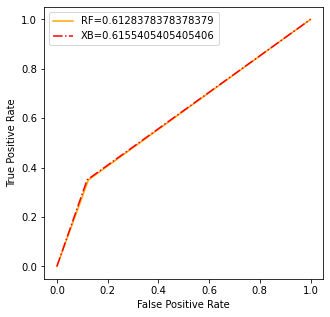

In [44]:
#define metrics
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

#random forest
rfpr, rtpr, thresold = roc_curve(y_test,yrh_pred)
auc_logistic = auc(rfpr,rtpr)

#Xgboost
xfpr, xtpr, thresold = roc_curve(y_test,yxh_pred)
auc_logistic3 = auc(xfpr,xtpr)


#create ROC curve
plt.figure(figsize = (5,5))
plt.plot(rfpr,rtpr,linestyle = "-",color='orange',label="RF="+str(auc_logistic))
plt.plot(xfpr,xtpr,linestyle = "-." ,color='red',label="XB="+str(auc_logistic3))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=2)
plt.show()

#### Sugessions:
-> After banancing data we can not see much difference in model

-> There is evidence that overfitting is involved in this model

-> We can improve this model by trying some of the feature : sampling, overfitting and feature engineering

-> We can also try SVM and Logestic regression to see the difference.